In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [31]:
df=pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [32]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [33]:
select_feature= df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
select_feature.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


<function matplotlib.pyplot.show(close=None, block=None)>

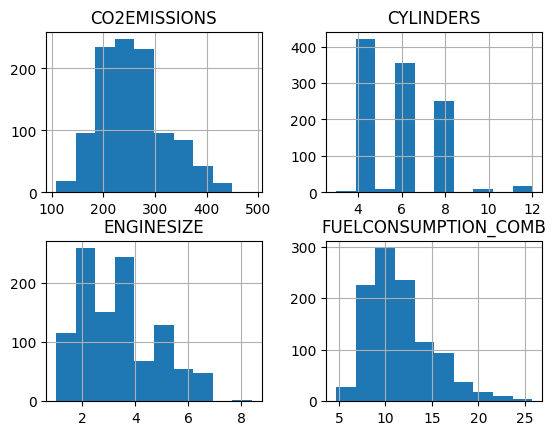

In [34]:
plot_graph=select_feature[['CO2EMISSIONS','CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB']]
plot_graph.hist()
plt.show

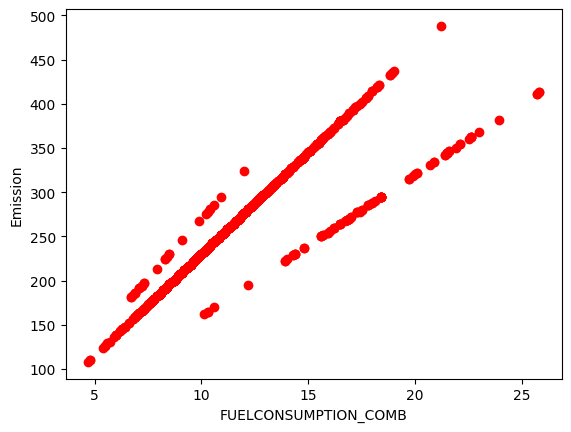

In [35]:
plt.scatter(select_feature.FUELCONSUMPTION_COMB, select_feature.CO2EMISSIONS,  color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

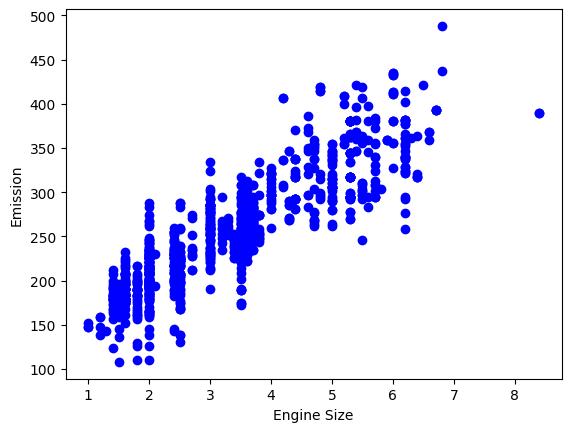

In [36]:
plt.scatter(select_feature.ENGINESIZE,select_feature.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [37]:
msk=np.random.rand(len(df))<0.8
train=select_feature[msk]
test=select_feature[~msk]

<function matplotlib.pyplot.show(close=None, block=None)>

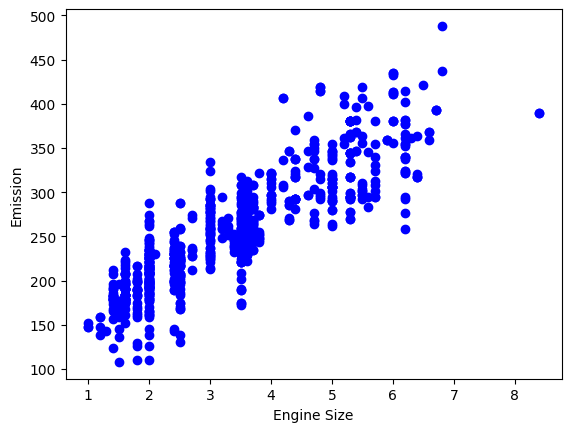

In [38]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show

In [39]:
from sklearn import linear_model
regression=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(train_x,train_y)

#coefficient
print("Coefficient = ",regression.coef_)
print("Intercept = ",regression.intercept_)


Coefficient =  [[39.02829477]]
Intercept =  [125.40636778]


Text(0, 0.5, 'Emission')

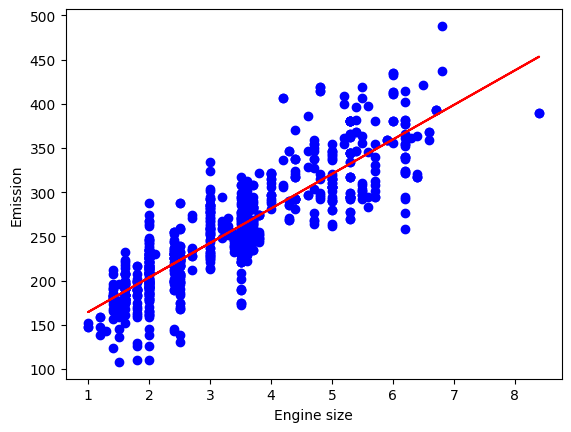

In [40]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regression.coef_[0][0]*train_x + regression.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

test_x=np.asanyarray(train[['ENGINESIZE']])
test_y=np.asanyarray(train[['CO2EMISSIONS']])

test_y_=regression.predict(test_x)

mse=mean_squared_error(test_y,test_y_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
#print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )
print("MSE = ",mse)
print(test_y_)

Mean absolute error: 23.72
R2-score: 0.76
MSE =  986.7667371329437
[[203.46295731]
 [219.07427522]
 [183.94880993]
 [262.00539946]
 [262.00539946]
 [262.00539946]
 [262.00539946]
 [269.81105842]
 [219.07427522]
 [219.07427522]
 [262.00539946]
 [355.67330691]
 [355.67330691]
 [308.83935318]
 [308.83935318]
 [308.83935318]
 [308.83935318]
 [355.67330691]
 [203.46295731]
 [203.46295731]
 [203.46295731]
 [203.46295731]
 [203.46295731]
 [203.46295731]
 [203.46295731]
 [242.49125208]
 [242.49125208]
 [242.49125208]
 [242.49125208]
 [242.49125208]
 [281.51954685]
 [371.28462481]
 [242.49125208]
 [203.46295731]
 [242.49125208]
 [203.46295731]
 [242.49125208]
 [242.49125208]
 [289.3252058 ]
 [289.3252058 ]
 [328.35350057]
 [289.3252058 ]
 [328.35350057]
 [289.3252058 ]
 [289.3252058 ]
 [281.51954685]
 [242.49125208]
 [242.49125208]
 [242.49125208]
 [281.51954685]
 [242.49125208]
 [203.46295731]
 [281.51954685]
 [281.51954685]
 [359.57613638]
 [281.51954685]
 [359.57613638]
 [359.57613638]
 [390

In [42]:
from sklearn import linear_model
train_x=np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

print("Coefficient = ",reg.coef_)
print("Intercept = ",reg.intercept_)

Coefficient =  [[16.12188714]]
Intercept =  [69.15514394]


In [43]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

predict=reg.predict(test_x)
print("R2-score: %.2f" % r2_score(test_y , predict) )
print("Mean absolute error: %.2f" % np.mean(np.absolute(predict - test_y)))

R2-score: 0.80
Mean absolute error: 19.64
